# 데이터셋 출처
   + https://www.kaggle.com/uciml/pima-indians-diabetes-database

## 데이터 구성

   + Pregnancies : 임신 횟수
   + Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
   + BloodPressure : 이완기 혈압 (mm Hg)
   + SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
   + Insulin : 2시간 혈청 인슐린 (mu U / ml)
   + BMI : 체질량 지수 (체중kg / 키(m)^2)
   + DiabetesPedigreeFunction : 당뇨병 혈통 기능
   + Age : 나이
   + Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


# 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터셋 로드

In [2]:
df = pd.read_csv("diabetes_feature.csv")
df.shape

(768, 16)

# 학습,예측 데이터 만들기

In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_Insulin'],
      dtype='object')

In [4]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
    'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
    'Insulin_nan', 'low_glu_Insulin']]
X.shape

(768, 9)

In [5]:
y = df["Outcome"]
y.shape

(768,)

In [6]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split 으로 만듭니다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42)

In [7]:
# train 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_train.shape, y_train.shape

((614, 9), (614,))

In [8]:
# test 세트의 문제와 정답을 확인해 주세요.

X_test.shape, y_test.shape

((154, 9), (154,))

# 머신러닝 알고리즘 사용하기

In [35]:
# DecisionTree 를 불러옵니다.

# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier(max_depth=11, random_state=42)
# model

## 최적의 max_depth 값 찾기

In [10]:
from sklearn.metrics import accuracy_score

for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


## bagging

In [11]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(random_state=42)
# model

## Boosting

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(random_state=42)

## 여러 개의 알고리즘을 사용해서 비교하기

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


estimators = [DecisionTreeClassifier(random_state=42), 
             RandomForestClassifier(random_state=42), 
             GradientBoostingClassifier(random_state=42) 
            ]
estimators

[DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42)]

In [42]:
max_depth = np.random.randint(2, 20, 10)
max_depth

array([11, 13, 19, 11,  3,  4,  3, 17,  8, 12])

In [43]:
max_features = np.random.uniform(0.3, 1.0, 10)

In [75]:
results = []
for estimator in estimators:
    result = []
    result.append(estimator.__class__.__name__)
    results.append(result)
results

[['DecisionTreeClassifier'],
 ['RandomForestClassifier'],
 ['GradientBoostingClassifier']]

In [90]:
param_distributions["n_estimators"] = np.random.randint(100, 1000, 10)
param_distributions

{'max_depth': array([ 3,  3, 15, 19, 12,  2, 13,  6, 10, 14]),
 'max_features': array([0.41371427, 0.53931203, 0.84130766, 0.77290702, 0.63480147,
        0.43903705, 0.99869608, 0.54834406, 0.92657625, 0.88953715]),
 'n_estimators': array([965, 876, 816, 997, 111, 199, 896, 985, 143, 614])}

In [99]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = np.random.randint(2, 20, 10)
max_features = np.random.uniform(0.6, 1.0, 10)

param_distributions = {"max_depth" : max_depth, 
                       "max_features" : max_features}
results = []
for estimator in estimators:
    result = []
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions["n_estimators"] = np.random.randint(100, 200, 100)
        
    clf = RandomizedSearchCV(estimator,
                             param_distributions,
                             n_iter=10,  
                             scoring="accuracy", 
                             n_jobs=-1,  
                             cv=10, 
                             verbose=2
                      )
    clf.fit(X_train, y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test, y_test))
    result.append(clf.cv_results_)
    results.append(result)
results

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.9s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.0s finished


[['DecisionTreeClassifier',
  {'max_features': 0.9544346115652227, 'max_depth': 4},
  0.8714965626652565,
  0.8766233766233766,
  {'mean_fit_time': array([0.00488691, 0.00718129, 0.00568366, 0.00418823, 0.0050858 ,
          0.00368979, 0.00438793, 0.00428841, 0.00518548, 0.00423796]),
   'std_fit_time': array([0.00082864, 0.0050023 , 0.00413739, 0.00139628, 0.0017533 ,
          0.00063777, 0.00101707, 0.00063903, 0.00087012, 0.00067818]),
   'mean_score_time': array([0.0018945 , 0.00249252, 0.0023942 , 0.00199456, 0.00379028,
          0.00279241, 0.00199492, 0.00169561, 0.00214822, 0.00189447]),
   'std_score_time': array([0.00029938, 0.00080407, 0.00091474, 0.00063136, 0.0037262 ,
          0.00193401, 0.00077223, 0.00045736, 0.00063122, 0.00029898]),
   'param_max_features': masked_array(data=[0.8663697609341258, 0.992522588655403,
                      0.9728729441624215, 0.6325306883958247,
                      0.9003614660377156, 0.6325306883958247,
                      0.950

In [101]:
df = pd.DataFrame(results, columns=["estimator", "best_params", 
                               "train_score", "test_score", "cv_result"])

In [106]:
pd.DataFrame(df.loc[1, "cv_result"]).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.392062,0.053847,0.018950,0.004741,195,0.972873,15,"{'n_estimators': 195, 'max_features': 0.972872...",0.903226,0.887097,...,0.887097,0.918033,0.803279,0.901639,0.901639,0.934426,0.950820,0.902274,0.038735,1
4,0.206243,0.046390,0.011194,0.003760,109,0.855898,4,"{'n_estimators': 109, 'max_features': 0.855898...",0.887097,0.838710,...,0.887097,0.901639,0.852459,0.901639,0.901639,0.918033,0.967213,0.899101,0.035287,2
5,0.250275,0.045492,0.010599,0.001119,113,0.992523,16,"{'n_estimators': 113, 'max_features': 0.992522...",0.870968,0.870968,...,0.887097,0.918033,0.819672,0.901639,0.901639,0.934426,0.950820,0.899075,0.036951,3
2,0.249002,0.033003,0.011546,0.001010,130,0.86637,10,"{'n_estimators': 130, 'max_features': 0.866369...",0.870968,0.887097,...,0.887097,0.918033,0.819672,0.885246,0.901639,0.918033,0.950820,0.897409,0.035034,4
7,0.263743,0.044398,0.012897,0.002012,132,0.86637,14,"{'n_estimators': 132, 'max_features': 0.866369...",0.887097,0.870968,...,0.887097,0.918033,0.819672,0.885246,0.901639,0.918033,0.950820,0.897409,0.035034,4
1,0.311868,0.038239,0.014888,0.001988,172,0.704502,12,"{'n_estimators': 172, 'max_features': 0.704502...",0.887097,0.870968,...,0.887097,0.918033,0.803279,0.901639,0.885246,0.918033,0.950820,0.897382,0.040718,6
6,0.331978,0.064405,0.017743,0.007732,169,0.704502,14,"{'n_estimators': 169, 'max_features': 0.704502...",0.887097,0.870968,...,0.887097,0.918033,0.803279,0.901639,0.885246,0.918033,0.950820,0.897382,0.040718,6
3,0.384190,0.075984,0.017290,0.003397,183,0.855898,10,"{'n_estimators': 183, 'max_features': 0.855898...",0.870968,0.887097,...,0.887097,0.918033,0.819672,0.885246,0.885246,0.918033,0.950820,0.895769,0.035181,8
8,0.177567,0.010637,0.013194,0.008008,102,0.704502,10,"{'n_estimators': 102, 'max_features': 0.704502...",0.870968,0.870968,...,0.887097,0.901639,0.803279,0.901639,0.901639,0.918033,0.950820,0.895769,0.040753,8
9,0.213564,0.013031,0.010194,0.000850,117,0.855898,10,"{'n_estimators': 117, 'max_features': 0.855898...",0.870968,0.854839,...,0.887097,0.918033,0.803279,0.885246,0.901639,0.918033,0.950820,0.892544,0.040694,10


# Grid Search

   + https://sklearn.org/modules/cross_validation.html#cross-validation
   + https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [13]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=42)
param_grid = {"max_depth" : range(3,12), 
              "max_features": [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 214 out of 225 | elapsed:    3.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    3.7s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=1)

In [14]:
clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

In [15]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.7, random_state=42)

In [16]:
clf.best_score_

0.8664934026389444

In [17]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.005186,0.002475,0.002593,1.196122e-03,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.005585,0.001850,0.004188,2.849724e-03,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.012369,0.008592,0.005387,5.835656e-03,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.004190,0.000399,0.001794,3.990662e-04,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.877049,0.859963,0.029149,4
27,0.005186,0.002392,0.001994,1.092145e-03,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.861789,0.878049,0.837398,0.853659,0.860656,0.858310,0.013162,5
17,0.006981,0.002676,0.001795,3.981833e-04,6,0.7,"{'max_depth': 6, 'max_features': 0.7}",0.861789,0.869919,0.804878,0.894309,0.860656,0.858310,0.029337,5
31,0.003590,0.000798,0.001596,4.882081e-04,9,0.5,"{'max_depth': 9, 'max_features': 0.5}",0.853659,0.902439,0.780488,0.861789,0.885246,0.856724,0.041834,7
11,0.005983,0.004038,0.002195,3.994017e-04,5,0.5,"{'max_depth': 5, 'max_features': 0.5}",0.837398,0.878049,0.821138,0.878049,0.868852,0.856697,0.023222,8
1,0.008971,0.004889,0.009572,1.418448e-02,3,0.5,"{'max_depth': 3, 'max_features': 0.5}",0.780488,0.910569,0.813008,0.853659,0.918033,0.855151,0.053625,9
6,0.008774,0.005796,0.004593,2.157687e-03,4,0.5,"{'max_depth': 4, 'max_features': 0.5}",0.788618,0.886179,0.804878,0.878049,0.918033,0.855151,0.049790,9


In [18]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [19]:
clf.score(X_test, y_test)

0.8701298701298701

In [20]:
max_depth = np.random.randint(3, 20, 10)
max_depth

array([ 8, 14, 14, 12, 19,  5,  4, 11, 14,  5])

In [21]:
model

DecisionTreeClassifier(random_state=42)

In [22]:
max_features = np.random.uniform(0.7, 1.0, 100)
max_features

array([0.9147806 , 0.82804594, 0.96041684, 0.75915336, 0.94413359,
       0.94790355, 0.85105732, 0.78144766, 0.85457425, 0.73253396,
       0.97984689, 0.99462709, 0.85081147, 0.74865335, 0.86660149,
       0.88831789, 0.82213702, 0.87982491, 0.9985206 , 0.98254337,
       0.80020526, 0.92779016, 0.99441601, 0.77202635, 0.87259458,
       0.97832489, 0.86544147, 0.84589049, 0.79227326, 0.73772929,
       0.70530575, 0.84976421, 0.70332234, 0.78400129, 0.93507531,
       0.75533631, 0.73521348, 0.90674567, 0.74246514, 0.82971749,
       0.95497979, 0.914113  , 0.79000049, 0.96783271, 0.95359848,
       0.85998464, 0.93124638, 0.736494  , 0.71227586, 0.98487624,
       0.84181419, 0.95769105, 0.82680795, 0.74595635, 0.89194751,
       0.90824975, 0.76635021, 0.86344444, 0.93985238, 0.78843465,
       0.79816208, 0.8184154 , 0.80929473, 0.86305571, 0.80037631,
       0.97850468, 0.85825924, 0.8783503 , 0.91812826, 0.9362634 ,
       0.9660268 , 0.9638092 , 0.9679882 , 0.77393657, 0.77800

In [23]:
param_distributions = {"max_depth" : max_depth, 
                       "max_features" : max_features, 
                       "min_samples_split" : list(range(2, 7))}
param_distributions

{'max_depth': array([ 8, 14, 14, 12, 19,  5,  4, 11, 14,  5]),
 'max_features': array([0.9147806 , 0.82804594, 0.96041684, 0.75915336, 0.94413359,
        0.94790355, 0.85105732, 0.78144766, 0.85457425, 0.73253396,
        0.97984689, 0.99462709, 0.85081147, 0.74865335, 0.86660149,
        0.88831789, 0.82213702, 0.87982491, 0.9985206 , 0.98254337,
        0.80020526, 0.92779016, 0.99441601, 0.77202635, 0.87259458,
        0.97832489, 0.86544147, 0.84589049, 0.79227326, 0.73772929,
        0.70530575, 0.84976421, 0.70332234, 0.78400129, 0.93507531,
        0.75533631, 0.73521348, 0.90674567, 0.74246514, 0.82971749,
        0.95497979, 0.914113  , 0.79000049, 0.96783271, 0.95359848,
        0.85998464, 0.93124638, 0.736494  , 0.71227586, 0.98487624,
        0.84181419, 0.95769105, 0.82680795, 0.74595635, 0.89194751,
        0.90824975, 0.76635021, 0.86344444, 0.93985238, 0.78843465,
        0.79816208, 0.8184154 , 0.80929473, 0.86305571, 0.80037631,
        0.97850468, 0.85825924, 0.878

In [24]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV( model,
                    param_distributions,
                    n_iter=1000,
                    scoring="accuracy",
                    n_jobs=-1,
                    cv=5,
                    random_state=42
                  )
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([ 8, 14, 14, 12, 19,  5,  4, 11, 14,  5]),
                                        'max_features': array([0.9147806 , 0.82804594, 0.96041684, 0.75915336, 0.94413359,
       0.94790355, 0.85105732, 0.78144766, 0.85457425, 0.73253396,
       0.97984689, 0.99462709, 0.85081147, 0.74865335, 0.86660149,...
       0.9660268 , 0.9638092 , 0.9679882 , 0.77393657, 0.77800294,
       0.96682695, 0.94250875, 0.9042981 , 0.98907274, 0.83340374,
       0.74621315, 0.81734583, 0.88824124, 0.85466813, 0.95553508,
       0.81399518, 0.73231266, 0.7498907 , 0.89592225, 0.75180748,
       0.73661696, 0.98500767, 0.72471287, 0.76815468, 0.91063663,
       0.78015523, 0.77442571, 0.70539941, 0.96791835, 0.95457371]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_state=42, 

In [25]:
clf.best_params_

{'min_samples_split': 4, 'max_features': 0.7459563481471504, 'max_depth': 5}

In [26]:
clf.best_score_

0.8697454351592697

In [27]:
clf.score(X_test, y_test)

0.8701298701298701

In [28]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
306,0.003705,0.000407,0.001294,0.000398,4,0.742465,5,"{'min_samples_split': 4, 'max_features': 0.742...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
886,0.004199,0.001181,0.001803,0.000403,4,0.705306,5,"{'min_samples_split': 4, 'max_features': 0.705...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
291,0.003206,0.000404,0.001395,0.000486,4,0.724713,5,"{'min_samples_split': 4, 'max_features': 0.724...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
891,0.004698,0.001077,0.001807,0.001380,4,0.732313,5,"{'min_samples_split': 4, 'max_features': 0.732...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1
153,0.003790,0.001596,0.001397,0.000489,4,0.746213,5,"{'min_samples_split': 4, 'max_features': 0.746...",0.878049,0.910569,0.813008,0.853659,0.893443,0.869745,0.033985,1


# 학습과 예측하기

In [29]:
# 학습을 시킵니다.
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# 정확도(Accuracy)측정하기

In [30]:
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [31]:
feature_names = X_train.columns.tolist()

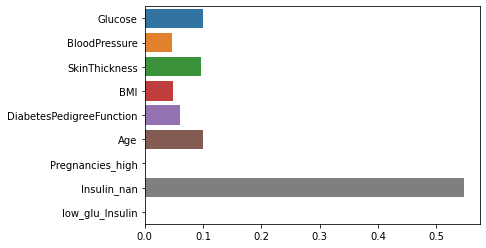

In [32]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [33]:
# 다르게 예측한 개수를 구해서 diff_count 에 할당해 줍니다.
# DT : 28
# RF : 20
# GB : 24

(y_predict != y_test).sum()

28

In [34]:
# accuracy score 를 구합니다.
# DT : 0.818
# RF : 0.870
# GB : 0.844
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

81.81818181818183